In [77]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Analyzing 911 Calls from Kaggle
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [78]:
# Import csv and assign to DF
df = pd.read_csv('911.csv')

# Show top 5 rows of DF
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [79]:
# Get more information from DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [80]:
# What are the Top 5 Zip Codes?
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [81]:
# Top 5 Townships
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [82]:
# How many unique title codes are there?
df['title'].nunique()

110

In [83]:
# By looking at the data, I can see Title Codes has 3 different categories, traffic, fire, and and ems. I will transform data to show this and name it Reason
df['reason'] = df['title'].apply(lambda title : title.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [84]:
# Now I can answer the question, what is the most common call or reason?
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

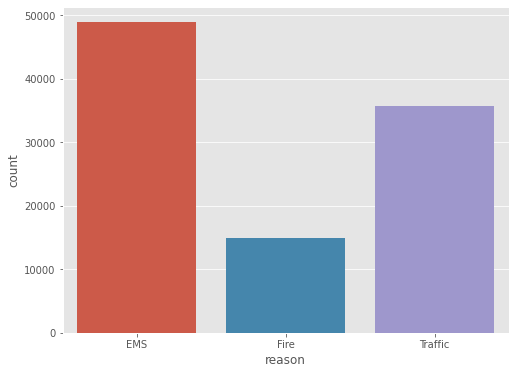

In [85]:
# I will show this visually as well with seasborn
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
sns.countplot(x='reason', data=df)

In [86]:
# I noticed the datatype in timestamp is a string, I need to change this to pandas datetime in order to use dates efficiently.
print(type(df['timeStamp'][0]))
df['timeStamp'] = df['timeStamp'].apply(pd.to_datetime)
print(type(df['timeStamp'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [87]:
# I will now use the datetime stamp to extract the hour, month, and day of the week
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [88]:
# dayofweek is in numbers, I will change to day string
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


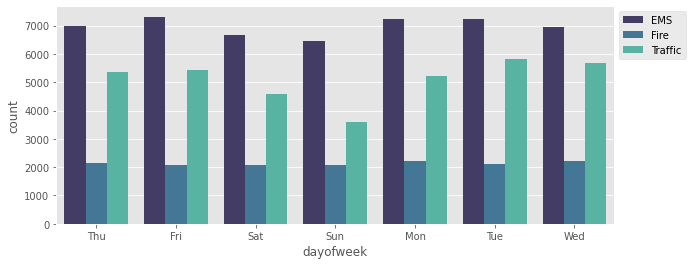

In [98]:
# A countplot using the day of the week with the reason
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='dayofweek', hue='reason', palette='mako')
plt.legend(bbox_to_anchor=(1,1))

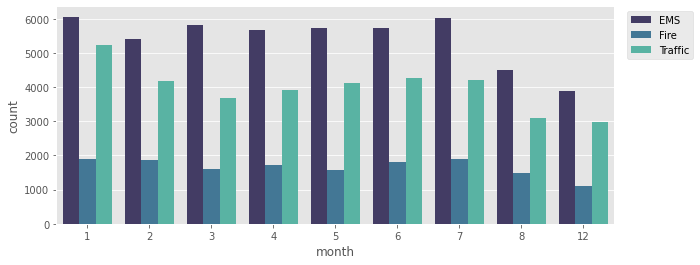

In [105]:
# A countplot using month with the reason
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='month', hue='reason', palette='mako')
plt.legend(bbox_to_anchor=(1.15,1))

<AxesSubplot:xlabel='month', ylabel='reason'>

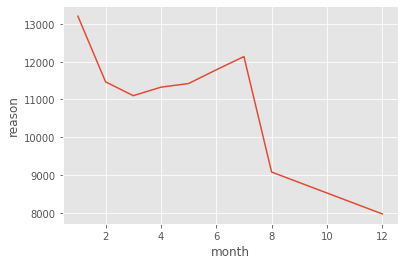

In [135]:
# Plot is missing a couple of months, will use a line graph to represent instead
byMonth = df.groupby('month').count().reset_index()
# sns.lineplot(data=byMonth, x='reason')
sns.lineplot(data=byMonth, x='month', y='reason')

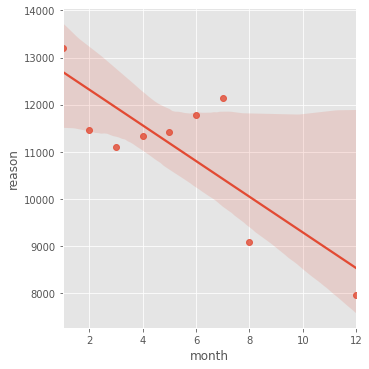

In [153]:
# Using scatter with regression line
sns.lmplot(data=byMonth, x='month', y='reason')

In [160]:
# Create a date column
df['date'] = df['timeStamp'].apply(lambda date: date.date())

# Group by date
byDate = df.groupby('date').count().reset_index()
byDate.head()

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


<AxesSubplot:xlabel='date', ylabel='reason'>

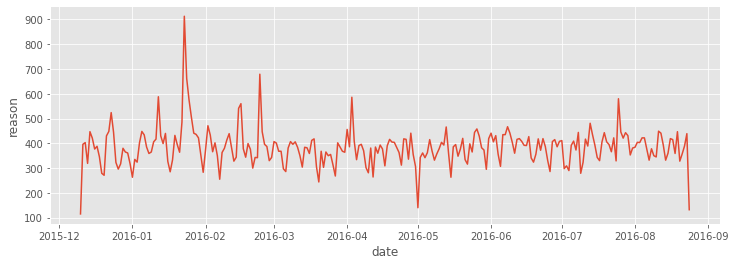

In [165]:
# Graph calls over a timeline
plt.figure(figsize=(12,4))
sns.lineplot(data=byDate, x='date', y='reason')

In [172]:
# Create different df for each reason/code
traffic = df[df['reason'] == 'Traffic']
fire = df[df['reason'] == 'Fire']
ems = df[df['reason'] == 'EMS']

Text(0, 0.5, 'Traffic')

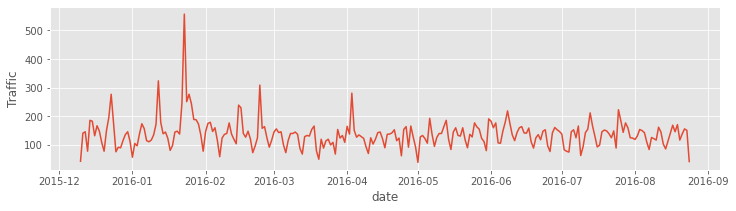

In [180]:
# Plot traffic over a timeline
plt.figure(figsize=(12,3))
traffic.groupby('date').count()['reason'].plot()
plt.ylabel('Traffic')

Text(0, 0.5, 'Fire')

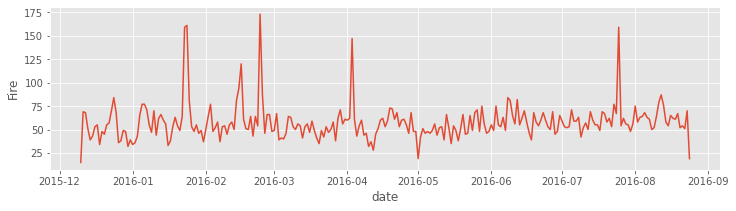

In [182]:
# Plot fire over a timeline
plt.figure(figsize=(12,3))
fire.groupby('date').count()['reason'].plot()
plt.ylabel('Fire')

Text(0, 0.5, 'EMS')

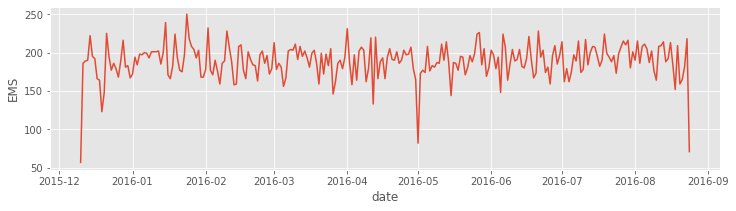

In [184]:
# Plot EMS over a timeline
plt.figure(figsize=(12,3))
ems.groupby('date').count()['reason'].plot()
plt.ylabel('EMS')

<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

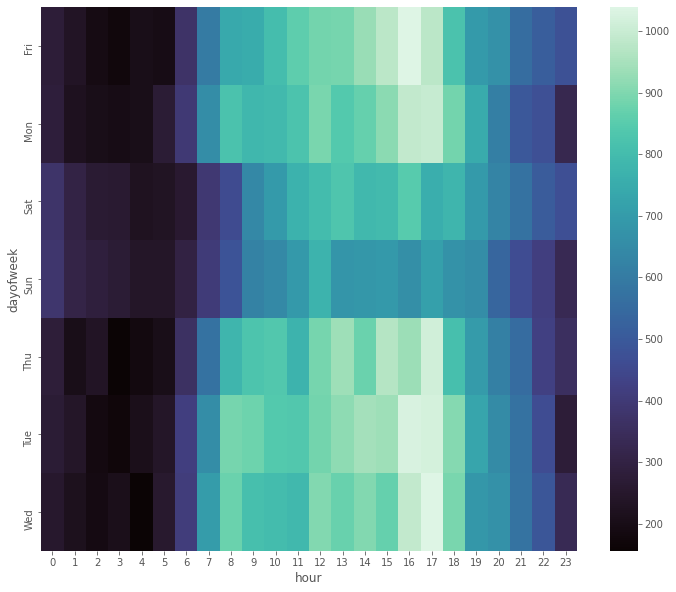

In [201]:
# Create a heatmap with dayofweek and hour. You can see larger concentrations comparing these axis
plt.figure(figsize=(12,10))
hm_HourDay = df.groupby(['dayofweek','hour']).count()['reason'].unstack()
sns.heatmap(data=hm_HourDay, cmap='mako')

<Figure size 864x720 with 0 Axes>

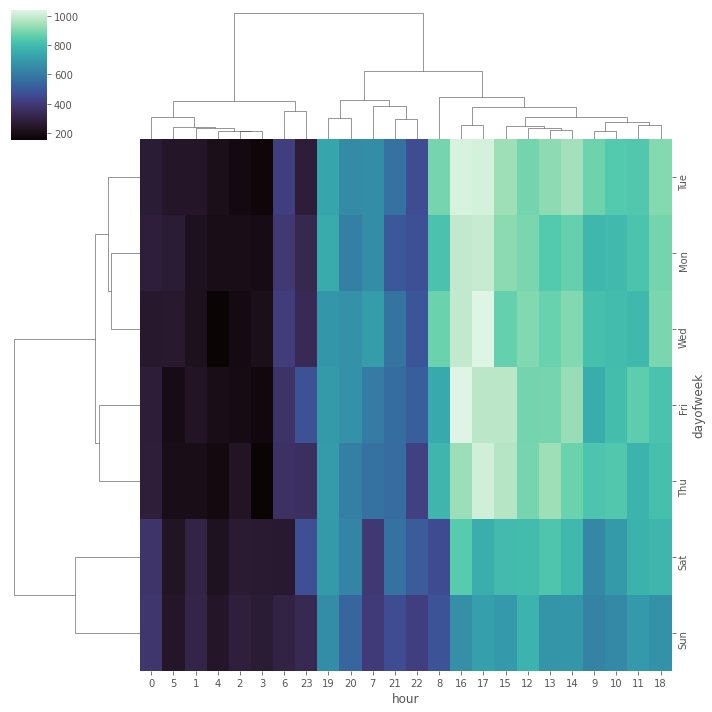

In [205]:
# A different view to show similarities
plt.figure(figsize=(12,10))
sns.clustermap(hm_HourDay, cmap='mako')

<AxesSubplot:xlabel='hour', ylabel='month'>

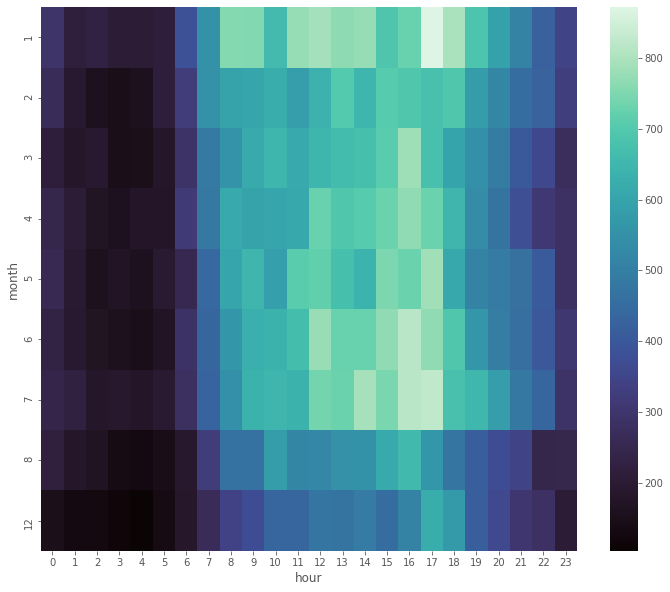

In [208]:
# Create a heatmap with dayofweek and month. You can see larger concentrations comparing these axis
plt.figure(figsize=(12,10))
hm_HourMonth= df.groupby(['month','hour']).count()['reason'].unstack()
sns.heatmap(data=hm_HourDay, cmap='mako')

<Figure size 864x720 with 0 Axes>

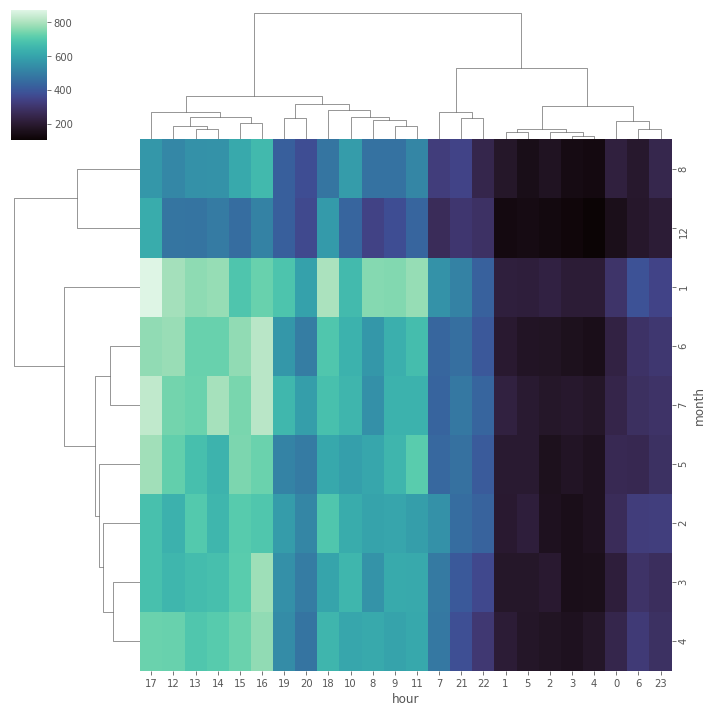

In [209]:
# A different view to show similarities
plt.figure(figsize=(12,10))
sns.clustermap(hm_HourMonth, cmap='mako')